In [15]:
# collisionData plot
import numpy as np

# Load Data

In [16]:
# load data
Data = np.load('logs/CollisionData.npy')
Data.shape

(15625, 17)

Data = np.hstack((config, y.reshape(-1,1),EEPosition,EEOrientation,EEQuaternion))

In [17]:
config, y, EEPosition, EEOrientation, EEQuaternion = Data[:,:6], Data[:,6], Data[:,7:10], Data[:,10:13], Data[:,13:17]

# Plot Points

<IPython.core.display.Javascript object>


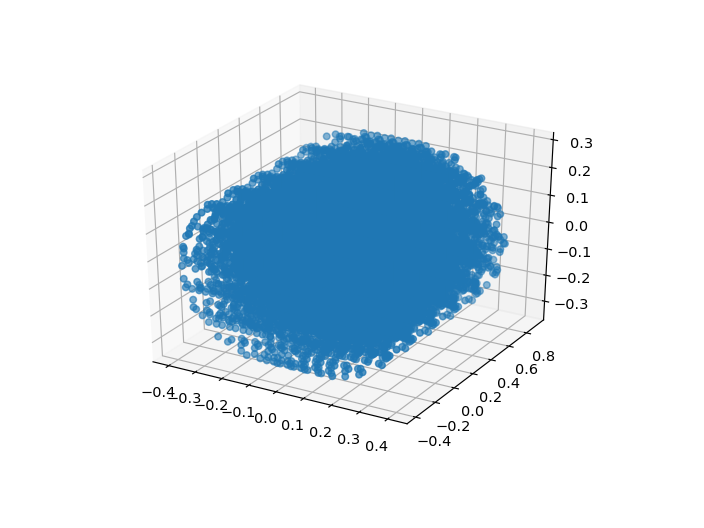

In [18]:
# plot all points
#%matplotlib inline
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition[:,1], EEPosition[:,2], -EEPosition[:,0])
plt.show()

[[ 0.03041244  0.38888866 -0.35084677]
 [ 0.10322642  0.37362725 -0.36277029]
 [ 0.11998701  0.22767195 -0.12087321]
 ...
 [-0.15877688  0.00702533  0.0676778 ]
 [-0.18119967  0.0674648   0.01897907]
 [-0.10452044  0.14297429  0.08828104]]


<IPython.core.display.Javascript object>


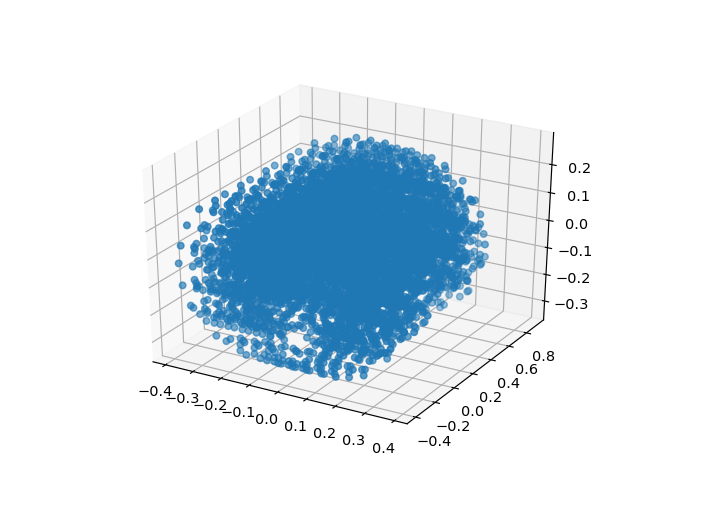

In [24]:
# plot points in C-free
EEPosition_free = EEPosition[y==0,:]
print(EEPosition_free)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_free[:,1], EEPosition_free[:,2], -EEPosition_free[:,0])
plt.show()

# Save C-free Points

In [19]:
# C-free point orientation
EEOrientation_free = EEOrientation[y==0,:]
print(EEOrientation_free)

# C-free point quaternion
EEQuaternion_free = EEQuaternion[y==0,:]
print(EEQuaternion_free)

[[-1.81518924  0.00859632 -1.55979395]
 [-1.86736417  0.27628389 -1.19941068]
 [ 0.0522236   0.27628317 -1.9421829 ]
 ...
 [-0.23976512 -0.78429139  2.07905149]
 [-0.90757191 -0.90408105  1.57079637]
 [-2.01463223 -0.49269596 -2.32834673]]
[[-0.56213045 -0.55225766 -0.43532819  0.43532783]
 [-0.70346385 -0.38172889 -0.42392337  0.42392284]
 [-0.09903967  0.0990403  -0.81533027  0.56179947]
 ...
 [-0.38312143 -0.09694591  0.81415594  0.42540523]
 [-0.55644733  0.00123414  0.7071057   0.43631008]
 [-0.20463535 -0.80454409 -0.39422914  0.39422908]]


# Insertion

In [25]:
# insertion of C-free points
from transforms3d import quaternions
total_config = EEPosition_free.shape[0]

new_config = 20   # !!! setup insertion linspace numbers here
EEPosition_new  = np.zeros((total_config*new_config, 3))
EEOrientation_new  = np.zeros((total_config*new_config, 3))
EEQuaternion_new  = np.zeros((total_config*new_config, 4))

count = 0
for i in range(total_config):
    quat = EEQuaternion_free[i,:]
    orient = EEOrientation_free[i,:]
    pos = np.matrix(EEPosition[i,:]).T
    #quat = quaternions.qinverse(quat)
    # inverse transformation matrix
    M = quaternions.quat2mat(quat)
    M = M.T
    
    offset = np.linspace(0,0.5,new_config)
    
    for j in range(new_config):
        insertion = np.array([[0],[0],[offset[j]]])
        
        # inverse transformation matrix
        insertion = -np.matmul(M,insertion)
        
        homo = np.array([0,0,0,1])
        T = np.hstack((M, insertion))
        T = np.vstack((T,homo))
        #print(insertion)
        #print(T)

        h_pos_new = T*np.vstack((pos,1))
        #print(h_pos_new)
        pos_new = np.asarray(h_pos_new[:3]).reshape(-1)
        EEPosition_new[count,:] = pos_new
        EEOrientation_new[count,:] = orient
        EEQuaternion_new[count,:] = quat
        count += 1
    #print(pos_new)
print(EEPosition_new)

[[ 0.34697592 -0.1911695  -0.34809393]
 [ 0.37250878 -0.19753425 -0.34838346]
 [ 0.39804164 -0.20389901 -0.34867298]
 ...
 [ 0.15110641  0.04767419  0.36385502]
 [ 0.17204578  0.04718885  0.37978701]
 [ 0.19298514  0.0467035   0.395719  ]]


### Plot Points After Insertion

<IPython.core.display.Javascript object>


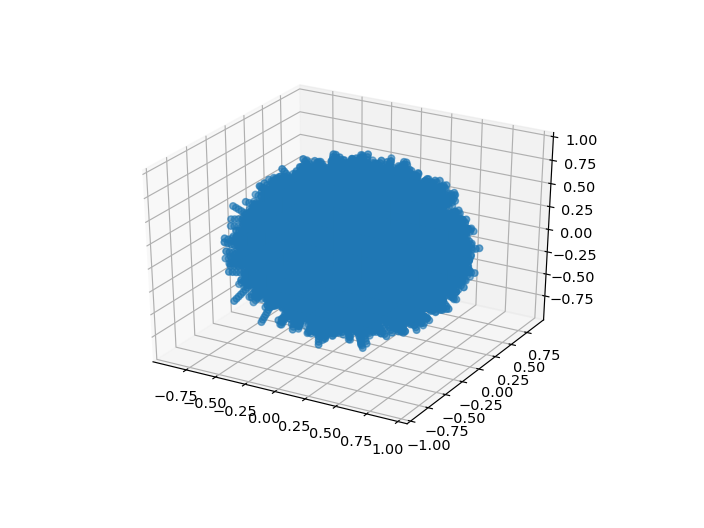

In [26]:
# plot new points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_new[:,1], EEPosition_new[:,2], -EEPosition_new[:,0])
plt.show()

### Save Inserted Points

In [31]:
print('all points shape: ',EEPosition.shape)
print('free points shape: ',EEPosition_free.shape)
print('new points shape: ',EEPosition_new.shape)

# save data
np.save('logs/EEPosition_new.npy',EEPosition_new)
np.save('logs/EEOrientation_new.npy',EEOrientation_new)
np.save('logs/EEQuaternion_new.npy',EEQuaternion_new)

all points shape:  (15625, 3)
free points shape:  (6959, 3)
new points shape:  (139180, 3)


# below here is a 2D demo (not very interested)

In [28]:
# set surface size
xmin = ymin = -0.2
xmax = ymax = 0.2

In [29]:
inplane_x = np.logical_and((-EEPosition_new[:,1]>xmin), (-EEPosition_new[:,1]<xmax))
inplane_y = np.logical_and((EEPosition_new[:,2]>ymin), (EEPosition_new[:,2]<ymax))
inplane_z = np.logical_and((-EEPosition_new[:,0]>-0.4), (-EEPosition_new[:,0]<-0.25))   # thick of Z-slice

In [30]:
# get points in plane
inplane_xy = np.logical_and(inplane_x, inplane_y)
inplane_xyz = np.logical_and(inplane_xy, inplane_z)
print(inplane_xyz)

EEPosition_new_inplane = EEPosition_new[inplane_xyz]
EEOrientation_new_inplane = EEOrientation_new[inplane_xyz]
EEQuaternion_new_inplane = EEQuaternion_new[inplane_xyz]

[False False False ... False False False]


<IPython.core.display.Javascript object>


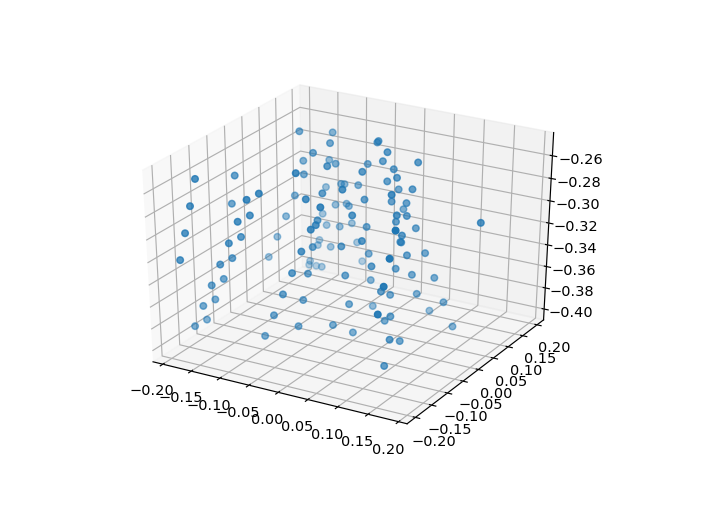

In [12]:
# plot inplane points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_new_inplane[:,1], EEPosition_new_inplane[:,2], -EEPosition_new_inplane[:,0])
plt.show()

In [14]:
print(EEQuaternion_new_inplane.shape)
print(EEPosition_new_inplane.shape)

(4080, 4)
(4080, 3)


<IPython.core.display.Javascript object>


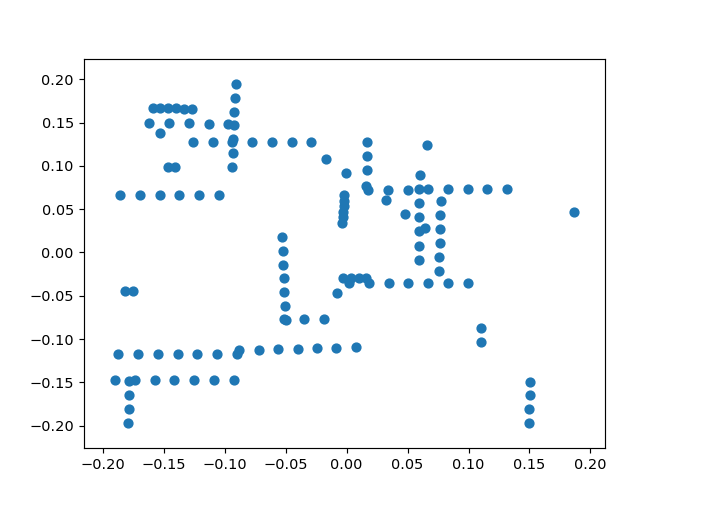

In [13]:
# plot plane
x_inplane = -EEPosition_new_inplane[:,1]
y_inplane = EEPosition_new_inplane[:,2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_inplane, y_inplane)
plt.show()

In [14]:
data = np.array([x_inplane,y_inplane])

NameError: name 'x_inplane' is not defined

In [15]:
#hisat = np.histogramdd(data.T,bins=[5,5],density=True)
%matplotlib inline
hist, xedges, yedges = np.histogram2d(x_inplane, y_inplane, bins=20)
plt.imshow(hist, extent=(np.amin(x_inplane), np.amax(x_inplane), np.amin(y_inplane), np.amax(y_inplane)))
plt.colorbar()
plt.show()

NameError: name 'x_inplane' is not defined

In [16]:
# 3D histogram doesn't work
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
# xpos = xpos.flatten('F')
# ypos = ypos.flatten('F')
# zpos = np.zeros_like(xpos)

# # Construct arrays with the dimensions for the 16 bars.
# dx = 0.5 * np.ones_like(zpos)
# dy = dx.copy()
# dz = hist.flatten()

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# plt.show()

In [17]:
# discretelize
plane_res = 0.01
xis = np.ceil((x_inplane - xmin) / plane_res).astype(np.int16)-1
yis = np.ceil((y_inplane - ymin) / plane_res).astype(np.int16)-1
print(xis)
print(yis)

NameError: name 'x_inplane' is not defined

NameError: name 'xis' is not defined

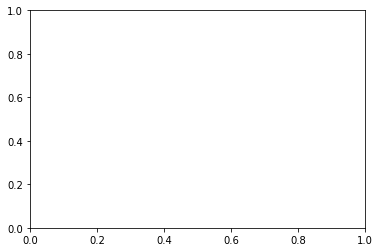

In [18]:
# plot discrete
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xis, yis,cmap="hot")
plt.show()

In [19]:
# map orientation inforation to each grid
hash_orientation = dict()
count = 0
for i in zip(xis,yis):
    if i in hash_orientation:
        value = hash_orientation[i]
        hash_orientation[i] = np.vstack((value,EEOrientation_new_inplane[count,:]))
    else:
        hash_orientation[i] = EEOrientation_new_inplane[count,:]
    count += 1
print(hash_orientation)

NameError: name 'xis' is not defined

In [23]:
# hash map to store orientation configs
hash_plot = dict()
hash_plot.fromkeys(hash_orientation.keys())

{(32, 13): None,
 (31, 14): None,
 (30, 16): None,
 (29, 17): None,
 (28, 19): None,
 (25, 6): None,
 (24, 7): None,
 (23, 8): None,
 (23, 9): None,
 (22, 10): None,
 (22, 11): None,
 (18, 5): None,
 (16, 5): None,
 (15, 6): None,
 (12, 9): None,
 (9, 9): None,
 (7, 9): None,
 (5, 10): None,
 (2, 10): None,
 (0, 11): None,
 (13, 39): None,
 (18, 39): None,
 (24, 36): None,
 (25, 37): None,
 (26, 38): None,
 (29, 31): None,
 (30, 31): None,
 (31, 30): None,
 (32, 30): None,
 (33, 30): None,
 (34, 29): None,
 (1, 22): None,
 (5, 8): None,
 (5, 7): None,
 (6, 6): None,
 (6, 5): None,
 (6, 4): None,
 (6, 3): None,
 (6, 2): None,
 (0, 25): None,
 (22, 26): None,
 (21, 27): None,
 (20, 27): None,
 (19, 28): None,
 (18, 28): None,
 (17, 28): None,
 (38, 28): None,
 (39, 27): None,
 (36, 18): None,
 (38, 17): None,
 (13, 19): None,
 (11, 18): None,
 (10, 16): None,
 (8, 15): None,
 (6, 13): None,
 (5, 11): None,
 (3, 10): None,
 (2, 8): None,
 (0, 6): None,
 (30, 14): None,
 (30, 13): None,
 (